<h2>Learner 3: Perceptron</h2>

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import logisticClassify2 as lc
from mltools.linearC import linearClassify

# Original data taken from txt files
x = np.genfromtxt("X_train.txt", delimiter = None)
y = np.genfromtxt("Y_train.txt", delimiter = None)
x_test = np.genfromtxt("X_test.txt", delimiter = None)

# Extract certain data out to be validation data
x_validation = x[10000:20000]
y_validation = y[10000:20000]

# Extract certain data out to be training data
x_train = x[0:10000]
y_train = y[0:10000]

<h1>SVD - Sklearn</h1>

In [128]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [140]:
errTrain = []
errValidation = []
k = [i for i in range(2, 13)]

for i in k:
    svd = TruncatedSVD(n_components = i)

    # Train
    x_tr = svd.fit_transform(x_train)
    x_tr, _ = ml.transforms.rescale(x_tr)
    y_tr = y_train

    # validation
    svd = TruncatedSVD(n_components = i)
    x_val = svd.fit_transform(x_validation)
    x_val, _ = ml.transforms.rescale(x_val)
    y_val = y_validation

    perceptron = Perceptron(fit_intercept = True, n_iter = 1000, alpha = 2)
    perceptron = perceptron.fit(x_tr, y_tr)

    Yhat_train = perceptron.predict(x_tr)
    Yhat_validation = perceptron.predict(x_val)
    
    err_train = np.mean(Yhat_train.reshape(y_tr.shape) != y_tr)
    err_validation = np.mean(Yhat_validation.reshape(y_val.shape) != y_val)

    errTrain.append(err_train)
    errValidation.append(err_validation)


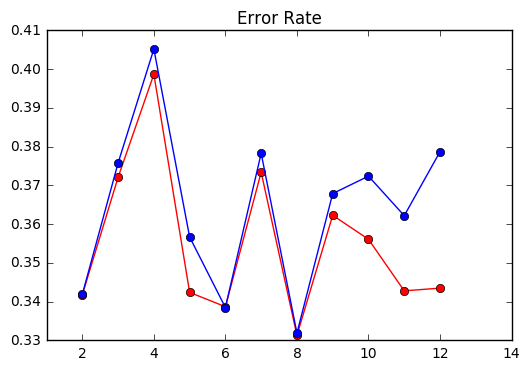

In [141]:
plt.plot(k, errTrain, c = 'r', marker = 'o')
plt.plot(k, errValidation, c = 'b', marker = 'o')
plt.xlim([1, 14])
plt.title("Error Rate")
plt.show()

In [138]:
svd = TruncatedSVD(n_components = 8)

# Train
x_tr = svd.fit_transform(x_train)
x_tr, _ = ml.transforms.rescale(x_tr)
y_tr = y_train

# Validation
x_val = svd.fit_transform(x_validation)
x_val, _ = ml.transforms.rescale(x_val)
y_val = y_validation

perceptron = Perceptron(fit_intercept = True, n_iter = 1000, alpha = 25)
perceptron = perceptron.fit(x_tr, y_tr)

yhat_train = perceptron.predict(x_tr)
yhat_validation = perceptron.predict(x_val)

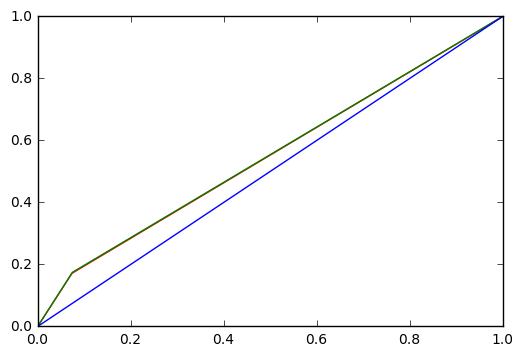

0.549957114808
0.548773092827
(10000, 8)


In [139]:
roc_tr = metrics.roc_curve(y_tr, yhat_train)
roc_va = metrics.roc_curve(y_val, yhat_validation)
plt.plot(roc_va[0], roc_va[1], 'r', roc_tr[0], roc_tr[1], 'g')
plt.plot([0,1], [0,1])
plt.show()

print(metrics.auc(roc_tr[0], roc_tr[1]))
print(metrics.auc(roc_va[0], roc_va[1]))
print(x_tr.shape)

<h1>Kitchen Sink</h1>

In [7]:
# from numpy import atleast_2d as twod

# x = ml.transforms.rescale(x_train[0:100])
# y = y_train[0:100]
# k = 2

# a, b = ml.transforms.fkitchensink(x, k, "linear")

# # print(twod(a).dot(b))

# # perceptron = linearClassify(x, y, stopIter = 5000);

[[ 0.  0.]]


<h1>SVD</h1>

In [ ]:
# from mltools.linearC import linearClassify

# # Pick k features among the training data
# a, b = ml.transforms.fsvd(x_train, 2)
# x_tr = a
# x_tr, _ = ml.rescale(x_tr)
# y_tr = y_train

# # Pick k featurese from validation data
# c, d = ml.transforms.fsvd(x_validation, 2)
# x_val = c
# x_val, _ = ml.rescale(x_val)
# y_val = y_train

# # Train the perceptron model here
# perceptron = linearClassify(x_tr, y_tr, stopIter = 5000);

In [ ]:
# # Plot the training data
# ml.plotClassify2D(perceptron, x, y)
# plt.show()

In [ ]:
# # Plot the validation data
# ml.plotClassify2D(perceptron, x_val, y_val)
# plt.show()

In [ ]:
# errTrain = perceptron.err(x_tr, y_tr)
# errValidation = perceptron.err(x_val, y_val)

# aucTrain = perceptron.auc(x_tr, y_tr)
# aucValidation = perceptron.auc(x_val, y_val)

# print(errTrain, errValidation)
# print(aucTrain, aucValidation)

In [ ]:
# from mltools.linearC import linearClassify

# err_train = []
# err_validation = []

# auc_train = []
# auc_validation = []

# k = [i for i in range(1, 15)]

# for i in k:
    
#     # Pick k features among the training data
#     a, b = ml.transforms.fsvd(x_train, i)
#     x_tr = a
#     x_tr, _ = ml.rescale(x_tr)
#     y_tr = y_train

#     # Pick k featurese from validation data
#     c, d = ml.transforms.fsvd(x_validation, i)
#     x_val = c
#     x_val, _ = ml.rescale(x_val)
#     y_val = y_train

#     # Train the perceptron model here
#     perceptron = linearClassify(x_tr, y_tr, stopIter = 5000);
    
#     errTrain = perceptron.err(x_tr, y_tr)
#     errValidation = perceptron.err(x_val, y_val)

#     aucTrain = perceptron.auc(x_tr, y_tr)
#     aucValidation = perceptron.auc(x_val, y_val)
    
#     # Store data
#     err_train.append(errTrain)
#     err_validation.append(errValidation)
#     auc_train.append(aucTrain)
#     auc_validation.append(aucValidation)

In [ ]:
# # Plot Error graph
# plt.title("Error Rate Plot")
# plt.plot(k, err_train, c = 'r', marker = 'o', label = "Training Error")
# plt.plot(k, err_validation, c = 'b', marker = 'o', label = "Validation Error")
# plt.legend(bbox_to_anchor = (0,1), loc = 2, borderaxespad = 1)

# plt.xlim([0, 15])
# plt.xlabel("K Features")
# plt.ylabel("Error Rate")
# plt.show()

In [ ]:
# # Plot AUC graph
# plt.title("AUC Plot")
# plt.plot(k, auc_train, c = 'r', marker = 'o', label = "AUC Training")
# plt.plot(k, auc_validation, c = 'b', marker = 'o', label = "AUC Validation")
# plt.legend(bbox_to_anchor = (0,1), loc = 2, borderaxespad = 1)

# plt.xlim([0, 15])
# plt.xlabel("K Features")
# plt.ylabel("AUC values")
# plt.show()

In [ ]:
# q, w = ml.transforms.fsvd(x_train[0:2], 2)
# print("Original:")
# print(x_train[0:2])

# print()
# print("SVD:")
# print(q)